# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2381 Ахметгареев Карим Ильгизович и Самулевич Степан Александрович. Вариант №1.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный сигнал:

$\[
x(k), \quad k = 0, 1, 2, \ldots, N - 1
\]$

Дискретный прямоугольный импульс:

$\[
s_1(k) =
\begin{cases}
U, & n_0 \leq k \leq n_0 + n_{\text{имп}} - 1, \\
0, & \text{иначе}
\end{cases}
\]$

Дискретный единичный скачок:

$ \sigma_d(k) =
\begin{cases}
1, & k \geq 0, \\
0, & k < 0,
\end{cases}
\quad k \in \mathbb{Z} $

Линейная комбинация трёх гармонических сигналов:

$\[
s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)
\]$

где

$\[
x_i(k) = B_i \sin(\omega_i k), \quad i = 1, 2, 3
\]$

Для дискретного сигнала $ s(k) $:

Среднее значение:

$\[
\bar{s} = \frac{1}{N} \sum_{k=0}^{N-1} s(k)
\]$

Энергия:

$\[
E = \sum_{k=0}^{N-1} |s(k)|^2
\]$

Средняя мощность:

$\[
P = \frac{1}{N} \sum_{k=0}^{N-1} |s(k)|^2
\]$

Дискретный гармонический сигнал:

$\[
s(k) = C \cos(\omega_0 k)
\]$

Огибающая модуля сигнала:

$\[
|s(k)| = \sqrt{s^2_{\text{Re}}(k) + s^2_{\text{Im}}(k)}
\]$

Периодическая импульсная последовательность:

$\[
s_4(k) = \sum_{m=0}^{M-1} s_1(k - m n_{\text{период}})
\]$


## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Nb = 1
N = 30 + Nb

n0 = 3 + Nb
n_imp = 5 + Nb
U = 1 + Nb

B1 = 1.5 + Nb
B2 = 5.7 - Nb
B3 = 2.2 + Nb
w0 = np.pi / (1 + Nb)
w1 = np.pi / (4 + Nb)
w2 = np.pi / (8 + Nb)
w3 = np.pi / (16 + Nb)
a1 = 1.5 - Nb
a2 = 0.7 + Nb
a3 = 1.4 + Nb

a_coef = [a1, a2, a3]
B = [B1, B2, B3]
omega = [w1, w2, w3]

C = 1 + Nb
a = (-1) ** Nb * (0.8 + 0.005 * Nb)


def smart_xlim(x_axis, left_pad=3, right_pad=1):
    left = np.min(x_axis)
    right = np.max(x_axis)
    return left - left_pad, right + right_pad


def plot_signal(n, s, title, xlabel='n (дискретное время)', center_axis=True):
    plt.figure(figsize=(7, 4))
    markerline, stemlines, baseline = plt.stem(n, s)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Амплитуда')
    if center_axis:
        xmin, xmax = smart_xlim(n)
        plt.xlim(xmin, xmax)
        plt.axhline(0, color='black', linewidth=1)
        plt.grid(True)
        plt.show()



### Задание 1

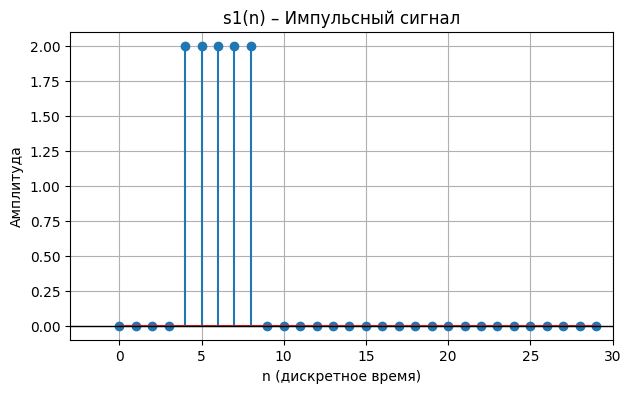

In [7]:
n_s1 = np.arange(0, N - 1)
s1 = np.zeros_like(n_s1, dtype=float)
start = n0
end = start + n_imp - 1
s1[start:end] = U
plot_signal(n_s1, s1, title="s1(n) – Импульсный сигнал")

## Задание 1  
Дискретный прямоугольный импульс задаётся выражением:

$$
s_1(k)=
\begin{cases}
U, & n_0 \le k \le n_0+n_{imp}-1, \\
0, & \text{иначе}.
\end{cases}
$$

Для моделирования используется дискретный единичный скачок $\sigma_d(k)$.  
В этом случае импульс может быть записан в виде:

$$
s_1(k)=U\left[\sigma_d(k-n_0)-\sigma_d\left(k-(n_0+n_{imp})\right)\right].
$$

В программе формируется дискретная временная ось:

$$
n \in [0, N-1].
$$

Разность двух дискретных единичных скачков формирует прямоугольный импульс длительности $n_{imp}$, а умножение на коэффициент $U$ задаёт амплитуду импульса.


### Задание 2  

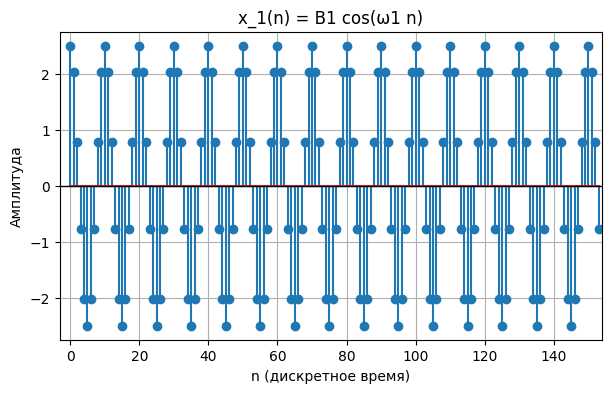

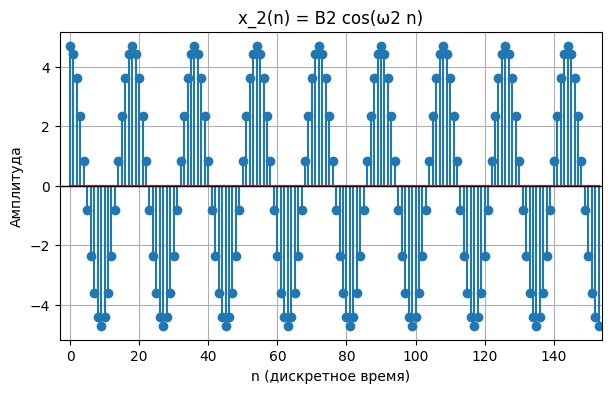

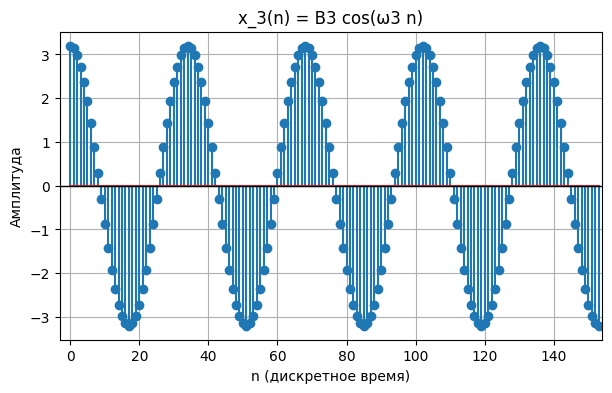

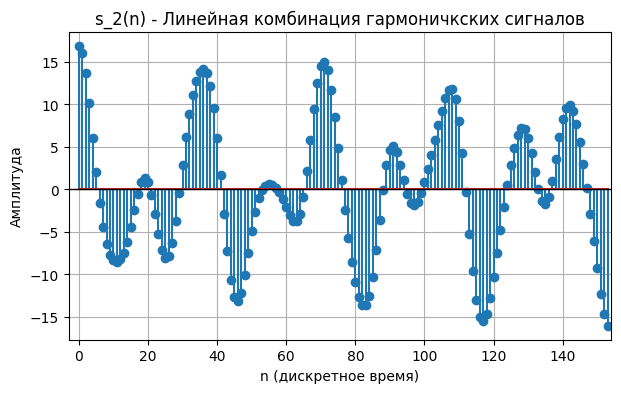

E =  313.3421288915375 mean_s2 =  0.07294423364416847


In [8]:
n_s2 = np.arange(0, 5 * N - 1)
x = {}
for k in range(3):
    x[k] = B[k] * np.cos(omega[k] * n_s2)
    plot_signal(n_s2, x[k], title=f"x_{k + 1}(n) = B{k + 1} cos(ω{k + 1} n)")

s2 = a1 * x.get(0) + a2 * x.get(1) + a3 * x.get(2)
plot_signal(n_s2, s2, title=f"s_2(n) - Линейная комбинация гармоничкских сигналов")
mean_s2 = 1 / N * np.sum(s2)
E = 1 / N * np.sum(s2 ** 2)

print("E = ", E, "mean_s2 = ", mean_s2)



Гармонические сигналы задаются выражениями:

$
x_i(k)=B_i\cos(\omega_i k), \quad i=1,2,3.
$

Линейная комбинация сигналов имеет вид:

$
s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k).
$

Сигналы формируются на интервале времени:

$
n \in [0, 5N-1].
$

### a) Операции моделирования

1. Формируются три гармонических сигнала с различными амплитудами $B_i$ $и цифровыми частотами $ \omega_i $.
2. Каждый гармонический сигнал умножается на соответствующий коэффициент $ a_i $.
3. Итоговый сигнал $ s_2(k) $ получается суммированием взвешенных гармоник.

В результате происходит наложение синусоид, при котором отдельные участки сигнала могут усиливаться или ослабляться.

### b) Характеристики последовательности

Среднее значение:

$$
\text{mean\_s2}=\frac{1}{N}\sum_{k=0}^{N-1}s_2(k).
$$

Энергия:

$$
E=\frac{1}{N}\sum_{k=0}^{N-1}s_2^2(k).
$$

Средняя мощность:

$$
P=\frac{1}{N}\sum_{k=0}^{N-1}s_2^2(k).
$$

Среднее значение характеризует наличие постоянной составляющей сигнала, а энергия и средняя мощность определяют вклад сигнала на заданном интервале наблюдения.

### Задание 3  

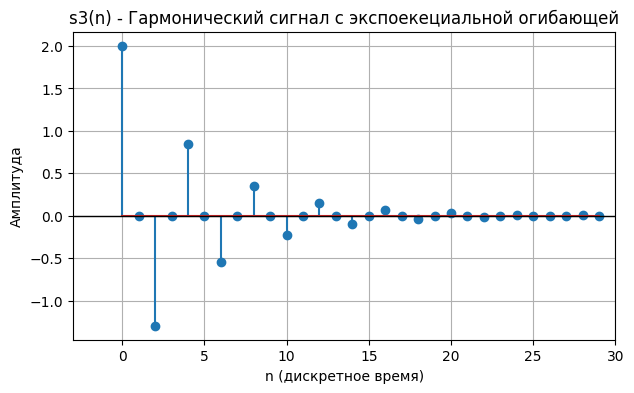

In [9]:
n_s3 = np.arange(0, N - 1)
s3 = np.abs(a) ** (n_s3) * C * np.cos(w0 * n_s3)
plot_signal(n_s3, s3, title="s3(n) - Гармонический сигнал с экспоекециальной огибающей")


Аналитическая формула сигнала имеет вид:

$
s_3(k)=|a|^k \cdot C \cdot \cos(\omega_0 k).
$

Сигнал формируется на интервале:

$
n \in [0, N-1].
$

При моделировании гармоническая составляющая  $\cos(\omega_0 k)$ умножается на экспоненциальную огибающую $|a|^k$.  
При  $|a|<1$ амплитуда сигнала убывает со временем, что приводит к затухающему гармоническому сигналу.

### Задание 4  


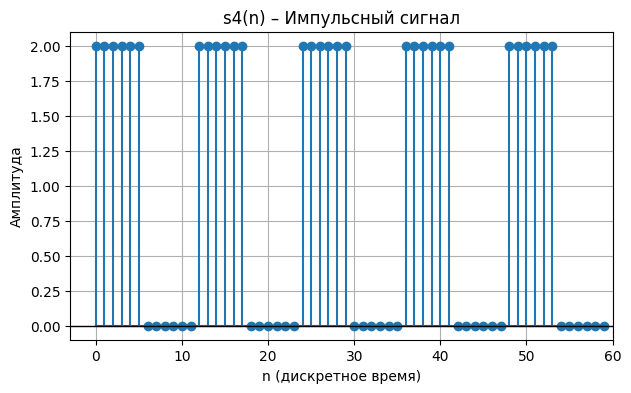

In [10]:
n_s4 = np.arange(0, 5 * 2 * n_imp)
s4 = np.zeros_like(n_s4, dtype=float)
for i in range(5):
    start = i * 2 * n_imp
    end = start + n_imp
    s4[start:end] = U

plot_signal(n_s4, s4, title="s4(n) – Импульсный сигнал")


Формируется периодическая последовательность прямоугольных импульсов со следующими параметрами:

1. амплитуда — $U$;
2. длительность импульса — $n_{imp}$;
3. период — $2n_{imp}$;
4. число периодов — 5.

Интервал наблюдения: $n \in \left[0, 5 \cdot 2n_{imp}-1\right]$\
Моделирование осуществляется путём циклического повторения одиночного прямоугольного импульса с периодом $2n_{imp}$, что обеспечивает формирование периодической последовательности.

### Выводы  
В ходе выполнения лабораторной работы были изучены и смоделированы различные типы дискретных сигналов, включая прямоугольный импульс, гармонические сигналы и их линейные комбинации.  
Были рассмотрены основные характеристики дискретных сигналов — среднее значение, энергия и мощность, а также проанализированы их взаимосвязи.  
Построенные графики подтвердили теоретические зависимости и позволили наглядно наблюдать влияние параметров (амплитуды, частоты и фазы) на форму и свойства сигналов.  
Таким образом, в результате лабораторной работы были закреплены теоретические знания о дискретных сигналах и приобретены практические навыки их моделирования и анализа средствами matplotlib и NumPy.
